In [1]:
import os
import itertools
import numpy as np
import pandas as pd
# PyTorch
import torch
import torchvision
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append('../src/')

%load_ext autoreload
%autoreload 2
# Importing our custom module(s)
import CIFAR10_utils as utils
import losses

In [3]:
random_state = 1001

In [4]:
nonlearned_train_losses = torch.load('./nonlearned_train_interpolation_random_state={}.pth'.format(random_state))
nonlearned_test_losses = torch.load('./nonlearned_test_interpolation_random_state={}.pth'.format(random_state))
learned_train_losses = torch.load('./learned_train_interpolation_random_state={}.pth'.format(random_state))
learned_test_losses = torch.load('./learned_test_interpolation_random_state={}.pth'.format(random_state))

/tmp/ipykernel_1895/844979698.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(['', r'$\theta_{SGD\ Transfer\ Init}$', '', '', '', r'$\theta_{SGD\ Learned\ Prior}$', ''])
/tmp/ipykernel_1895/844979698.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(['', r'$\theta_{SGD\ Transfer\ Init}$', '', '', '', r'$\theta_{SGD\ Learned\ Prior}$', ''])


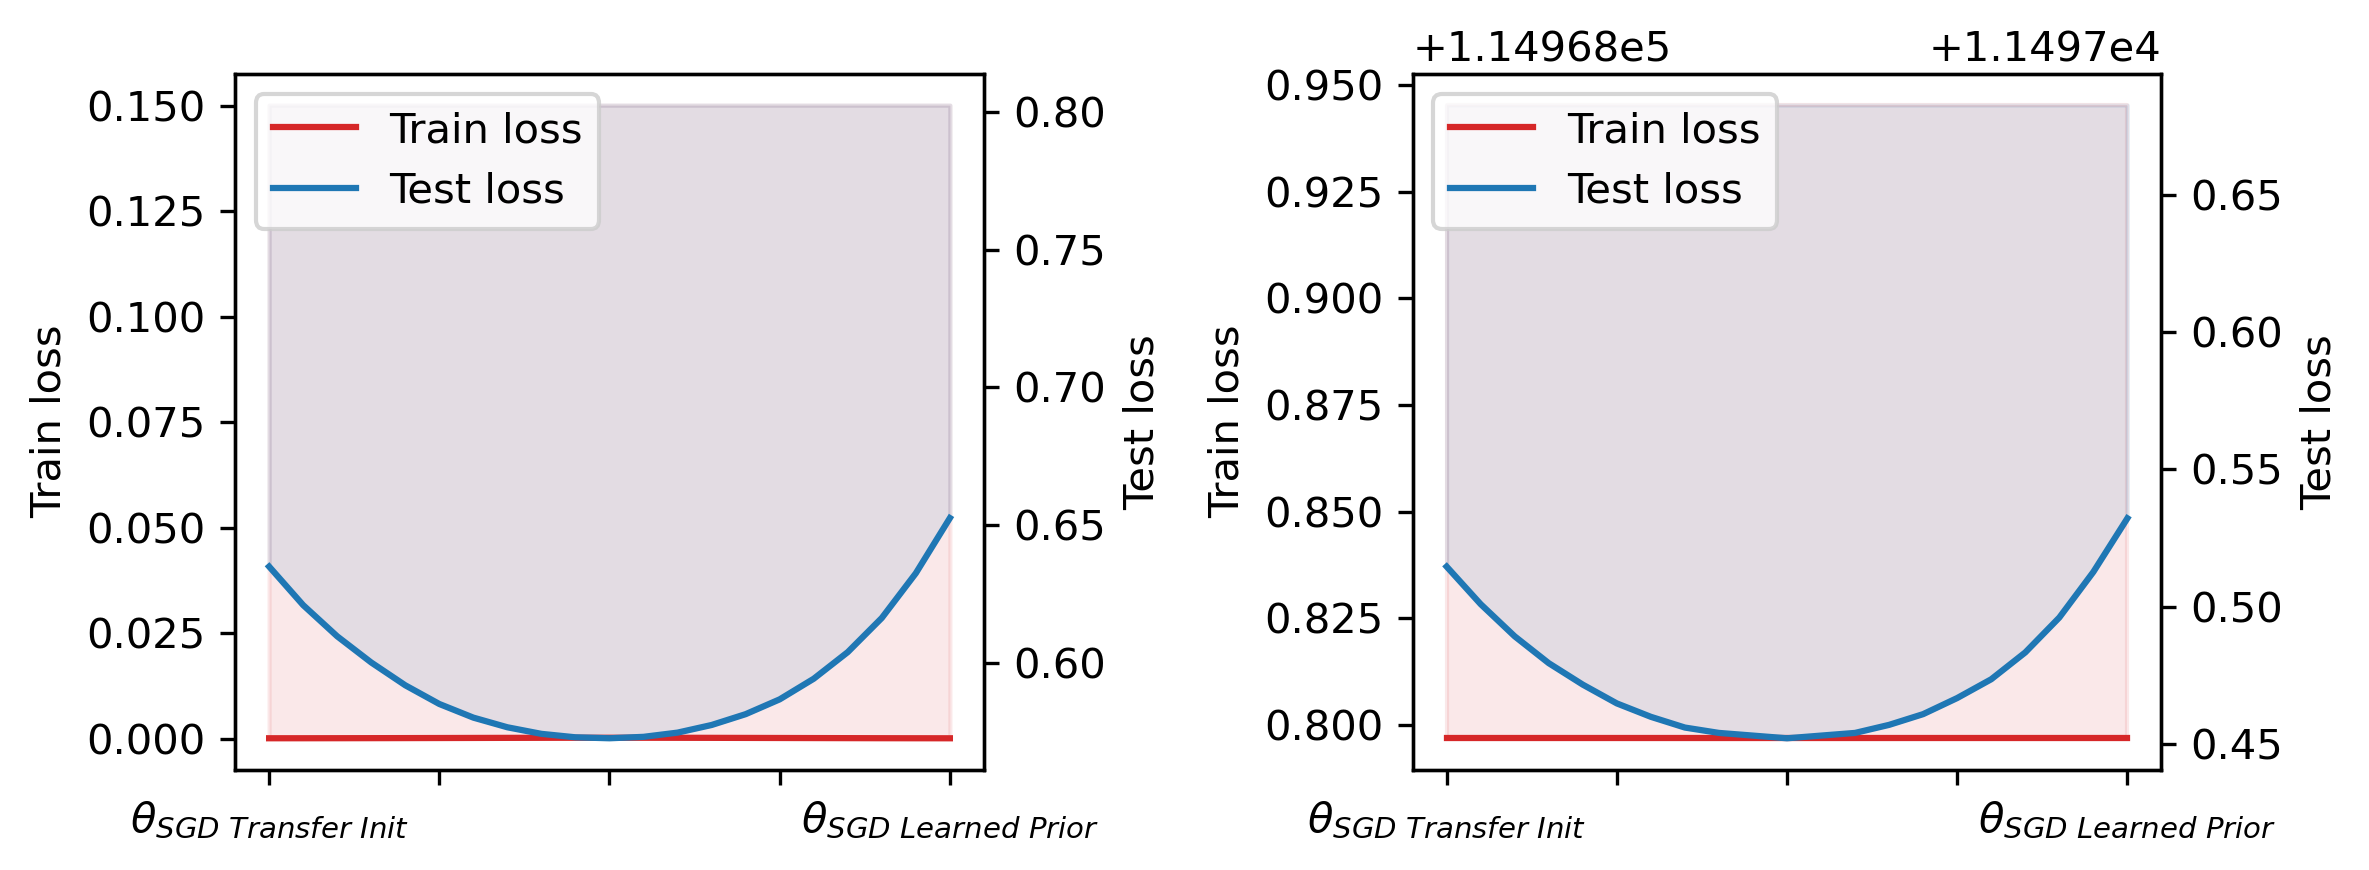

In [5]:
ncols, nrows = 2, 1
fig, ax = plt.subplots(ncols=ncols, nrows=nrows, figsize=(4*ncols, 3*nrows), dpi=300)

ax[0].plot(range(len(nonlearned_train_losses)), nonlearned_train_losses, color='#d62728', label='Train loss')
ax[0].fill_between(range(len(nonlearned_train_losses)), nonlearned_train_losses, torch.max(nonlearned_train_losses)+0.15, color='#d62728', alpha=0.1)
twin_ax0 = ax[0].twinx()
twin_ax0.plot(range(len(nonlearned_test_losses)), nonlearned_test_losses, color='#1f77b4', label='Test loss')
twin_ax0.fill_between(range(len(nonlearned_test_losses)), nonlearned_test_losses, torch.max(nonlearned_test_losses)+0.15, color='#1f77b4', alpha=0.1)

ax[1].plot(range(len(learned_train_losses)), learned_train_losses, color='#d62728')
ax[1].fill_between(range(len(learned_train_losses)), learned_train_losses, torch.max(learned_train_losses)+0.15, color='#d62728', alpha=0.1)
twin_ax1 = ax[1].twinx()
twin_ax1.plot(range(len(learned_test_losses)), learned_test_losses, color='#1f77b4')
twin_ax1.fill_between(range(len(learned_test_losses)), learned_test_losses, torch.max(learned_test_losses)+0.15, color='#1f77b4', alpha=0.1)


ax[0].set_xticklabels(['', r'$\theta_{SGD\ Transfer\ Init}$', '', '', '', r'$\theta_{SGD\ Learned\ Prior}$', ''])
ax[0].set_ylabel('Train loss')
twin_ax0.set_ylabel('Test loss')
ax[1].set_xticklabels(['', r'$\theta_{SGD\ Transfer\ Init}$', '', '', '', r'$\theta_{SGD\ Learned\ Prior}$', ''])
ax[1].set_ylabel('Train loss')
twin_ax1.set_ylabel('Test loss')

#ax[0].grid()
#ax[1].grid()
fig.legend(loc='upper left', bbox_to_anchor=(0,1), bbox_transform=ax[0].transAxes)
fig.legend(loc='upper left', bbox_to_anchor=(0,1), bbox_transform=ax[1].transAxes)
fig.tight_layout()
plt.show()